In [1]:
import os
import math
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
col = ['k', 'b', 'r', 'g', 'tab:orange', 'm']
mar = ['o', '^', 'v', 's', 'D']

import RPDM

path_data = 'data_L_D_1/'
if not os.path.exists(path_data):
    os.mkdir(path_data)
else:
    print(f'WARNING: Directory {path_data} already exists')

In [2]:
Ff = 96485
e_0 = 8.85 * 10**(-12)
R = 8.314
Temp = 450
A_k = 10**(-8)
A_L = 10**(-6)

an1 = 0.2 * 10
an2 = 0.1 * 10
e_f = 10
e_dl = 10
e_cdl = 78.5
d_dl = 1e-3
d_cdl = 1e-3
D_MV = 1
D_OV = 1
k1_0 = 5 * 100   # reactive
k2_0 = 0.996 * 2.874
k3_0 = 0.9 * 2.874
k4_0 = 5 * 100   # reactive
k5_0 = 2.874
k5 = k5_0

A_phi = R*Temp/Ff
phi_ext = 0.56/A_phi

In [3]:
def calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h, err_0_k=1e-6, show=0):
    
    F = RPDM.Film()

    F.D_MV = D_MV
    F.D_OV = D_OV
    F.k1_0 = k1_0
    F.k2_0 = k2_0
    F.k3_0 = k3_0
    F.k4_0 = k4_0
    F.k5_0 = k5_0
    F.an1 = an1
    F.an2 = an2
    F.e_f = e_f
    F.e_dl = e_dl
    F.e_cdl = e_cdl
    F.d_dl = d_dl
    F.d_cdl = d_cdl
    F.Temp = Temp
    F.Ff = Ff
    F.e_0 = e_0
    F.R = R
    F.A_k = A_k
    F.A_D = A_D
    F.A_L = A_L
    F.A_phi = A_phi
    F.phi_ext = phi_ext
    F.n_save = n_save

    
    L_arr = np.arange(L_b, L_e+dL, dL)
    N_L = len(L_arr)
    print(N_L)
    
    K2 = np.zeros(N_L)
    for i in tqdm(range(N_L)):
        show2 = show
        
        F.Nx = round(L_arr[i]/h) + 1
        F.L = L_arr[i]
        F.T = T
        
        F.init()
        F.solve()
        Data_k2 = F.Data_k2
        b = - (F.Ndata // 2)
        k2_mean = np.mean(Data_k2[b:])
        err_k = np.std(Data_k2[b:])/k2_mean
        if err_k > err_0_k:
            b = (b // 2)
            k2_mean = np.mean(Data_k2[b:])
            err_k = np.std(Data_k2[b:])/k2_mean
            if err_k > err_0_k:
                b = (b // 2)
                k2_mean = np.mean(Data_k2[b:])
                err_k = np.std(Data_k2[b:])/k2_mean
                if err_k > err_0_k:
                    print(f"Didn't converge on step {i}")
                    show2 = 1
        K2[i] = k2_mean
        #print(i+1)
    I = np.argmin(np.abs(K2 - k5))
    if I == 0:
        print(f'WARNING: Relax L is close to lower bound {L_b:.2f}')
    elif I == N_L - 1:
        print(f'WARNING: Relax L is close to upper bound {L_e:.2f}')
    print('Finished!')
    return L_arr, K2, L_arr[I]

# Calculating L at various D

## $D = 1 \cdot 10^{-11} м^2/c$

In [17]:
id = 1

pow_D = 11
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 2.65
L_e = 2.85
h = 0.005
dL = 5*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

531 3200001 802
10


In [18]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

10


  0%|          | 0/10 [00:00<?, ?it/s]

Finished!


In [19]:
print(K2)

[2.87641092        nan        nan 2.87454055        nan        nan
        nan        nan        nan        nan]


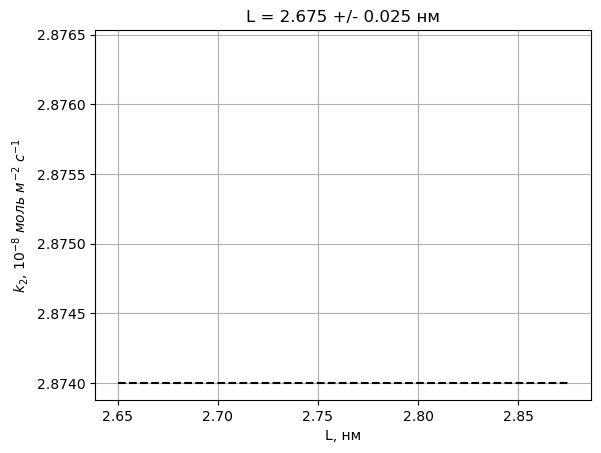

In [20]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-10} м^2/c$

In [46]:
id = 1

pow_D = 10
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 4.7
L_e = 4.9
h = 0.02
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

236 200001 802
11


In [47]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

11


  0%|          | 0/11 [00:00<?, ?it/s]

Finished!


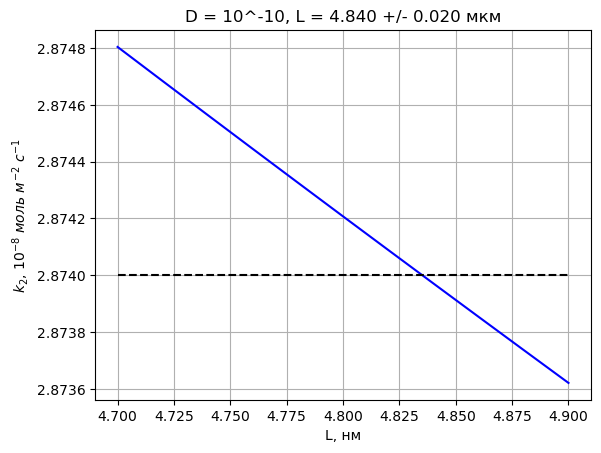

In [48]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 2 \cdot 10^{-10} м^2/c$

In [50]:
id = 1

pow_D = 10
A_D = 10**(-pow_D)
D = 2
D_MV = D
D_OV = D

L_b = 5.45
L_e = 5.50
h = 0.02
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

273 400001 802
4


In [51]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

4


  0%|          | 0/4 [00:00<?, ?it/s]

Finished!


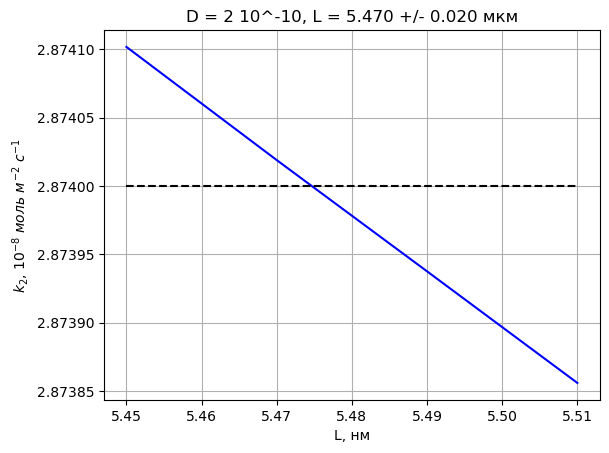

In [52]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 2 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 6 \cdot 10^{-10} м^2/c$

In [18]:
id = 2

pow_D = 10
A_D = 10**(-pow_D)
D = 6
D_MV = D
D_OV = D

L_b = 6.31
L_e = 6.32
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

632 4800001 802
3


In [19]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

3


  0%|          | 0/3 [00:00<?, ?it/s]

Finished!


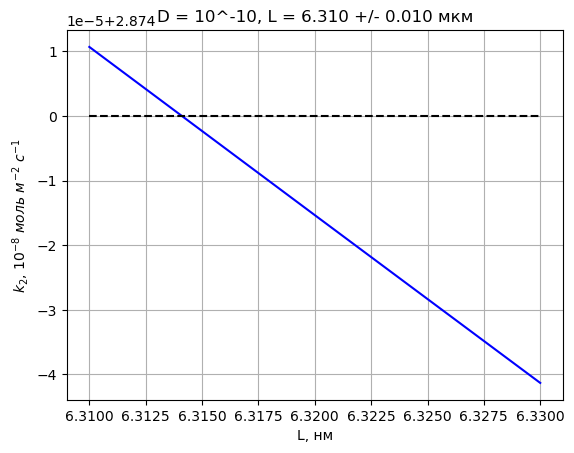

In [20]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-9} м^2/c$

In [92]:
id = 2

pow_D = 9
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 6.5
L_e = 6.7
h = 0.02
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

326 200001 802
11


In [93]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

11


  0%|          | 0/11 [00:00<?, ?it/s]

Finished!


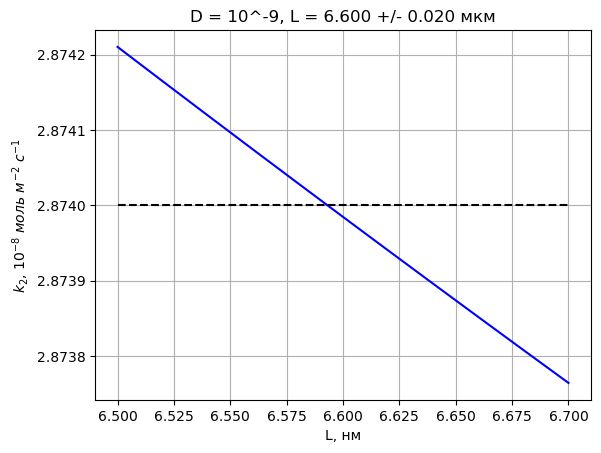

In [94]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 2 \cdot 10^{-9} м^2/c$

In [32]:
id = 1

pow_D = 9
A_D = 10**(-pow_D)
D = 2
D_MV = D
D_OV = D

L_b = 6.8
L_e = 7.0
h = 0.02
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

341 400001 802
11


In [33]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

11


  0%|          | 0/11 [00:00<?, ?it/s]

Finished!


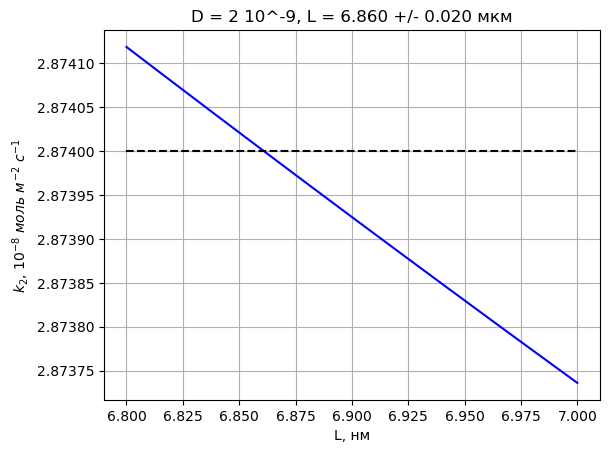

In [34]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 2 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 6 \cdot 10^{-9} м^2/c$

In [8]:
id = 1

pow_D = 9
A_D = 10**(-pow_D)
D = 6
D_MV = D
D_OV = D

L_b = 7.0
L_e = 7.1
h = 0.02
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

351 1200001 802
6


In [9]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

6


  0%|          | 0/6 [00:00<?, ?it/s]

Finished!


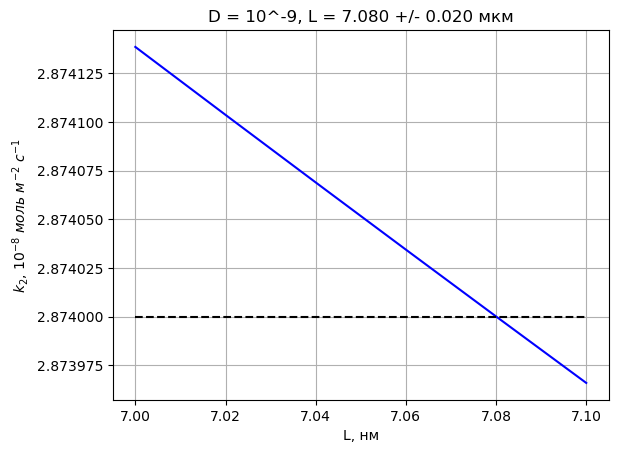

In [10]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} мкм')
plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-8} м^2/c$

In [89]:
id = 2

pow_D = 8
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 7.10
L_e = 7.15
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

711 800001 802
7


In [90]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

7


  0%|          | 0/7 [00:00<?, ?it/s]

Finished!


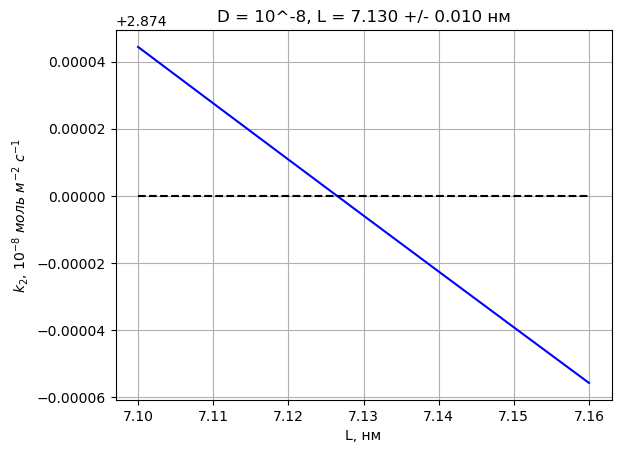

In [91]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} нм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 3 \cdot 10^{-8} м^2/c$

In [27]:
id = 1

pow_D = 8
A_D = 10**(-pow_D)
D = 3
D_MV = D
D_OV = D

L_b = 7.17
L_e = 7.19
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

718 2400001 802
4


In [28]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

4


  0%|          | 0/4 [00:00<?, ?it/s]

Finished!


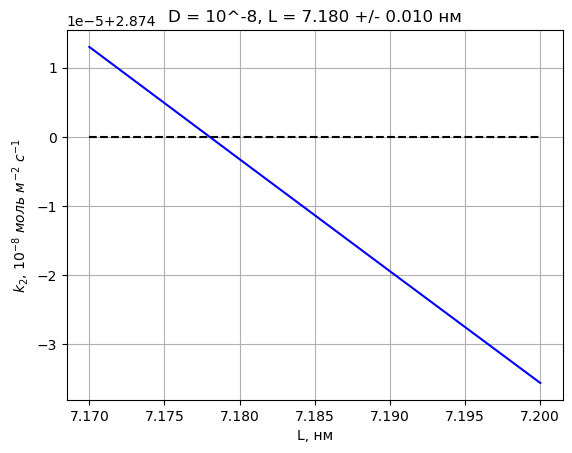

In [29]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} нм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-7} м^2/c$

In [79]:
id = 2

pow_D = 7
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 7.18
L_e = 7.21
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

719 800001 802
5


In [80]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

5


  0%|          | 0/5 [00:00<?, ?it/s]

Finished!


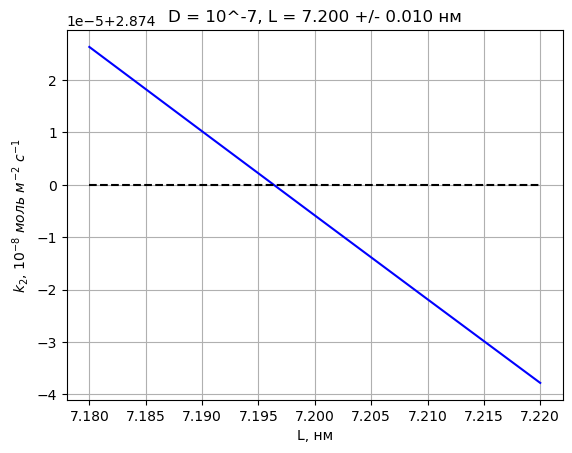

In [83]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} нм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-6} м^2/c$

In [75]:
id = 2

pow_D = 6
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 7.18
L_e = 7.21
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

719 800001 802
5


In [76]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

5


  0%|          | 0/5 [00:00<?, ?it/s]

Finished!


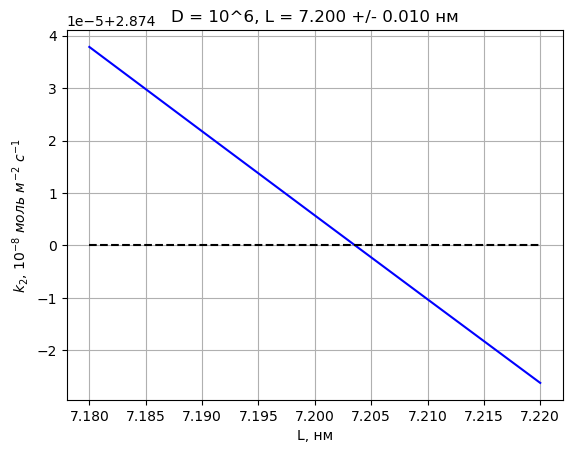

In [78]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} нм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

## $D = 1 \cdot 10^{-5} м^2/c$

In [71]:
id = 1

pow_D = 5
A_D = 10**(-pow_D)
D = 1
D_MV = D
D_OV = D

L_b = 7.18
L_e = 7.25
h = 0.01
dL = 1*h

T = 20
Ndata = 800

path = path_data + f'L_{D}_{pow_D}_{id}/'

Nx = round(L_b/h) + 1
Nt = math.ceil(2 * (D_MV + D_OV) * T / h**2 + 1)
n_save = round(Nt / Ndata)
if n_save < 1: n_save = 1
Ndata = (Nt - 1) // n_save + 2;
print(Nx, Nt, Ndata)
print(len(np.arange(L_b, L_e+dL, dL)))
if not os.path.exists(path):
    os.mkdir(path)
else:
    print(f'WARNING: Directory {path} already exists')

719 800001 802
9


In [72]:
L_arr, K2, L_relax = calc_L_D(D_MV, D_OV, A_D, L_b, L_e, dL, h)

9


  0%|          | 0/9 [00:00<?, ?it/s]

Finished!


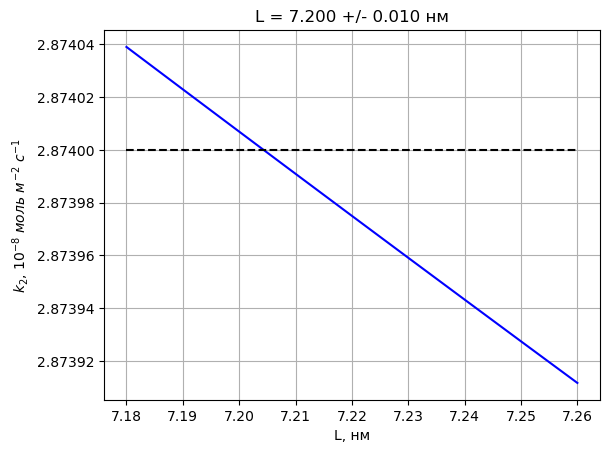

In [74]:
np.savetxt(path+'L_rel.txt', np.array([L_relax]))
np.savetxt(path+'L_arr.txt', L_arr)
np.savetxt(path+'K2.txt', K2)

plt.plot(L_arr, K2, 'b')
plt.plot([L_arr[0], L_arr[-1]], [k5, k5], 'k--')
plt.grid()
plt.xlabel('L, нм')
plt.ylabel(r'$k_2$, $10^{-8}$ $моль$ $м^{-2}$ $с^{-1}$')
#plt.ylim([np.min(K2)*0.998, np.max(K2)*1.002])
plt.title(f'D = 10^{-pow_D}, L = {L_relax:.3f} +/- {dL:.3f} нм')
#plt.savefig(path+f'k2_L.png', format='png', dpi=300)
plt.show()

 # Dependence of L on D

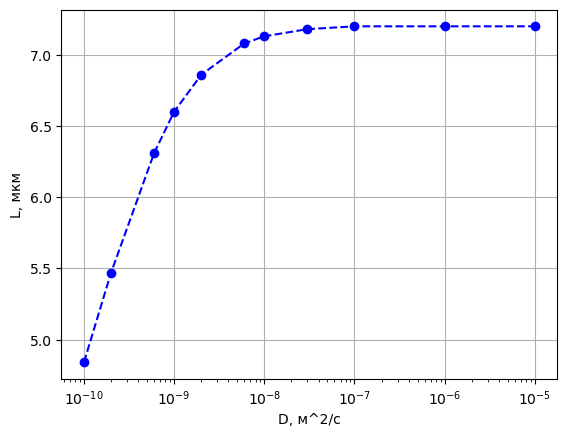

In [55]:
id = 1

D_arr = np.array([1*10**(-10), 2*10**(-10), 6*10**(-10), 1*10**(-9), 2*10**(-9), 6*10**(-9), 
                  1*10**(-8), 3*10**(-8), 1*10**(-7), 1*10**(-6), 1*10**(-5)])
L_relax_arr = np.array([4.84, 5.47, 6.31, 6.6, 6.86, 7.08, 7.13, 7.18, 7.2, 7.2, 7.2])

plt.plot(D_arr, L_relax_arr, 'bo')
plt.plot(D_arr, L_relax_arr, 'b--')
plt.xscale('log')
plt.xlabel(r'D, м^2/с')
plt.ylabel('L, мкм')
plt.grid()
plt.savefig(path_data+f'L_D_{id}.png', format='png', dpi=300)
plt.show()